# Sleep in Adolescents: Association with Social Media, Mental Health and Problem Behaviour

https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

# Display plots inline in the notebook
%matplotlib inline 

In [2]:
data=pd.DataFrame()

C:\Users\Admin2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


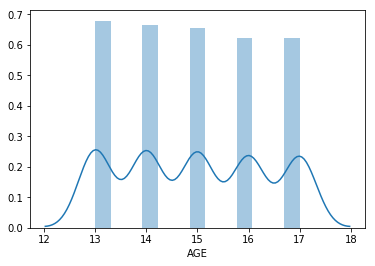

In [3]:
#Age 13-18 15mean
np.random.seed(256) # Set the random seed
data['AGE'] = np.random.randint(13,18, size= 2028,dtype='int')

sns.distplot(data['AGE'])

In [4]:
#Gender male= 48.9 female= 51.1
np.random.seed(256) # Set the random seed
gender=['Male','Female']
data['GENDER']= np.random.choice(gender, 2028,p=[0.489,0.511])

data['GENDER'].value_counts()

Female    1031
Male       997
Name: GENDER, dtype: int64

## Social media use
To measure the time spent on social media participants were asked the following question “How much time on average do you spend on the following: Being on social media on the internet for example on Facebook, Twitter, Instagram, Vine, Tumblr,
WhatsApp, Snapchat, Skype” the response to the question ranged from 1 (almost no time) to 8 (6 hours or more). When processing the date a change was made and the responses were combined into three groups; those that answered Almost no time, thirty minutes to an hour and around one hour, were combined and called Little time. Those who answered around two hours and around three hours were combined and called Average time and finally those that answered, around four hours, around five hours and six hours or more were combined and called Long time. This was done on the basis of a study by Mediakix (2017) stating that the
average person spends around 116 minutes a day on social media. 

In [5]:
# Little time 55.5% (1,077) ,Average time 30.4% (589), Long time 14.1% 
np.random.seed(256) # Set the random seed
smedia=['Little Time','Average Time','Long Time']
data['MEDIA']= np.random.choice(smedia, 2028,p=[0.555,0.304,0.141])

data['MEDIA'].value_counts()

Little Time     1123
Average Time     623
Long Time        282
Name: MEDIA, dtype: int64

## Sleep
To measure participant’s sleep they were asked the following question: “How many hours on average do you normally sleep at night?” And the following answers were available: 9 hours or more, around 9 hours, around 8 hours, around 7 hours, around 6 hours,6 hours or less. When processing the data a change was made and the six categories were combined into two groups, Sufficient sleep and Insufficient sleep. This was done according to official sleep recommendations for this age group (14-17 years old) which states that seven to eleven hours of sleep is appropriate but anything below is not (Hirshkowitz et al., 2015).

In [6]:
# sufficient sleep 86.5 Insufficient sleep 13.5. The Sufficient sleep
np.random.seed(256) # Set the random seed

sleep=['Sufficient_sleep','Inufficient_sleep']
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.MEDIA[idx] == 'Long Time':
            data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.75,0.25])
        
    if data.MEDIA[idx] == 'Average Time':
            data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.75,0.25])
        
    if data.MEDIA[idx] == 'Little Time':
            data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.865,0.135])
        
#data['SLEEP']= np.random.choice(sleep, 2028,p=[0.865,0.135])

data['SLEEP'].value_counts()

Sufficient_sleep     1524
Inufficient_sleep     504
Name: SLEEP, dtype: int64

In [7]:
data.groupby(['SLEEP','MEDIA']).count()

AGE  GENDER
SLEEP             MEDIA                     
Inufficient_sleep Average Time   222     222
                  Long Time      282     282
Sufficient_sleep  Average Time   401     401
                  Little Time   1123    1123

## Mental Health
. To measure mental wellbeing participants were asked the following question “How good is your mental health?” and the responses were measured on a 4 point Likert scale, range from 1 (very good) to 4 (bad).

In [8]:
# Very good 44.1% (876),Good 37.9% (754),Alright 12.5% (248),Bad 5.5% 
np.random.seed(256) # Set the random seed
mhealth=['Very good','Good','Alright','Bad']
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.MEDIA[idx] == 'Long Time':
            data.loc[idx, 'MENTAL_HEALTH'] = np.random.choice(mhealth,p=[0.055,0.125,0.379,0.441])
        
    if data.MEDIA[idx] == 'Average Time':
            data.loc[idx, 'MENTAL_HEALTH'] = np.random.choice(mhealth,p=[0.441,0.379,0.125,0.055])
        
    if data.MEDIA[idx] == 'Little Time':
            data.loc[idx, 'MENTAL_HEALTH'] = np.random.choice(mhealth,p=[0.441,0.379,0.125,0.055])
            
            

#data['MENTAL_HEALTH']= np.random.choice(mhealth, 2028,p=[0.441,0.379,0.125,0.055])

data['MENTAL_HEALTH'].value_counts()


Very good    903
Good         766
Bad          282
Alright       77
Name: MENTAL_HEALTH, dtype: int64

In [9]:
data.groupby(['SLEEP','MENTAL_HEALTH']).count()

AGE  GENDER  MEDIA
SLEEP             MENTAL_HEALTH                    
Inufficient_sleep Alright         77      77     77
                  Bad            282     282    282
                  Good           145     145    145
Sufficient_sleep  Good           621     621    621
                  Very good      903     903    903

## Problem Behaviour
Few questions were combined to measure problem behaviour that all involved inappropriate actions such as showing aggression by fighting and skipping school. The following questions were asked: “How often in the last 12 months, did the following of these six statement happen”: break rules at home, broke rules at school, got into a fight, skipped school, fled from home, and got in to trouble for lying and stealing. Answerswere collected using Likert scale which ranges from 1 (rare/almost never) to 4 (almost always or always). After combining all answers the range reach from 0-24 and the variable was named behaviour. The variable was split into three groups, First group ranged from 0-6 was named Low, the second group ranged from 7-12 and got the name Medium and third group range was from 13-24 and got named High. 

In [10]:
#Low 51.6% (1,022),Medium 45.4% (900),High 3.0% (59)

np.random.seed(256) # Set the random seed
behaviour=['Low','Medium','High']
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.MEDIA[idx] == 'Long Time':
            data.loc[idx, 'BEHAVIOUR'] = np.random.choice(behaviour,p=[0.03,0.454,0.516])
        
    if data.MEDIA[idx] == 'Average Time':
            data.loc[idx, 'BEHAVIOUR'] = np.random.choice(behaviour,p=[0.516,0.454,0.03])
        
    if data.MEDIA[idx] == 'Little Time':
            data.loc[idx, 'BEHAVIOUR'] = np.random.choice(behaviour,p=[0.516,0.454,0.03])
#data['BEHAVIOUR']= np.random.choice(behaviour, 2028,p=[0.516,0.454,0.03])

data['BEHAVIOUR'].value_counts()


Low       1041
Medium     705
High       282
Name: BEHAVIOUR, dtype: int64

In [11]:
data.groupby(['SLEEP','BEHAVIOUR']).count()

AGE  GENDER  MEDIA  MENTAL_HEALTH
SLEEP             BEHAVIOUR                                    
Inufficient_sleep High        282     282    282            282
                  Medium      222     222    222            222
Sufficient_sleep  Low        1041    1041   1041           1041
                  Medium      483     483    483            483

In [12]:
data.groupby(['GENDER','SLEEP']).count()

AGE  MEDIA  MENTAL_HEALTH  BEHAVIOUR
GENDER SLEEP                                                  
Female Inufficient_sleep  504    504            504        504
       Sufficient_sleep   527    527            527        527
Male   Sufficient_sleep   997    997            997        997

TypeError: unsupported operand type(s) for /: 'str' and 'int'

SOURCE: https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence WORKING ON IT

In [13]:
#Contingency Table
contingency_table=pd.crosstab(data["SLEEP"],data["MEDIA"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 MEDIA              Average Time  Little Time  Long Time
SLEEP                                                  
Inufficient_sleep           222            0        282
Sufficient_sleep            401         1123          0


In [14]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 222    0  282]
 [ 401 1123    0]]


In [15]:
#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table.values)
#print(b)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[154.82840237 279.0887574   70.08284024]
 [468.17159763 843.9112426  211.91715976]]


In [16]:
#Degree of Freedom
#no_of_rows=len(contingency_table.iloc[0:3,0])
#no_of_columns=len(contingency_table.iloc[0,0:4])
no_of_rows=2
no_of_col=3
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

NameError: name 'no_of_columns' is not defined

In [ ]:
#Significance Level 5%
alpha=0.05
#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

In [ ]:
#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
#critical_value: 3.841458820694124



In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

In [ ]:
#p-value: 0.7641771556220945
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

In [ ]:
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

In [ ]:
data['GENDER','SLEEP'].corr()

# References
1. Sleep in Adolescents: Association with Social Media, Mental Health and Problem Behaviour availabe online at
https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf accessed on 9/12/2019
2. Find the relationship between two categorical variables available at https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence accessed on  9/12/2019
3. Using Python to Find Correlation Between Categorical and Continuous Variables  available at https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1 accessed on 11/12/2019
